In [6]:
import tensorflow as tf

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images.shape #np array of # of images ... with 784 bytes

(55000, 784)

In [11]:
sample = mnist.train.images[1].reshape(28,28)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

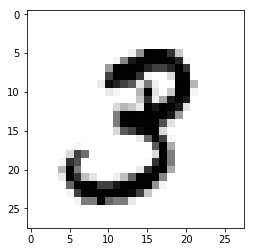

In [14]:
plt.imshow(sample,cmap='Greys')

In [15]:
learning_rate = 0.001 # says how quickly we want to apply the optimization function
training_epochs = 30 # # training cycles
batch_size = 100 # size of batches of data

In [16]:
n_classes = 10  # network parameters
n_sample = mnist.train.num_examples

In [17]:
n_input = 784 # 28*28 flattened image array

In [18]:
n_hidden_1 = 256
n_hidden_2 = 256

In [19]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation Function
    # X * weight + bias value
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU( X * weight + bias value) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [20]:
weights = { # weights dict
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [21]:
biases = { # weights dict
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [22]:
x = tf.placeholder('float',[None,n_input])

In [23]:
y= tf.placeholder('float',[None,n_classes])

In [24]:
pred = multilayer_perceptron(x,weights,biases)

In [25]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the Model

In [26]:
t = mnist.train.next_batch(1)

In [27]:
t[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [28]:
t[1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [29]:
Xsamp, ysamp = t

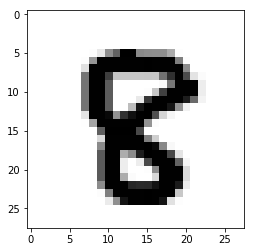

In [30]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [31]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

## Run the Session
#### now can do everything with sess, without haveing to have it all under the session

In [32]:
sess = tf.InteractiveSession() 

In [33]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [34]:
sess.run(init)

In [35]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.
    
    total_batch = int(n_sample/batch_size) #num batches
    
    for i in range(total_batch):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # use underscore when don't need tuple unpacking in python
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost {:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost 205.2613
Epoch: 2 cost 43.4993
Epoch: 3 cost 27.1512
Epoch: 4 cost 19.0381
Epoch: 5 cost 13.7564
Epoch: 6 cost 10.3228
Epoch: 7 cost 7.6124
Epoch: 8 cost 5.7263
Epoch: 9 cost 4.3452
Epoch: 10 cost 3.2226
Epoch: 11 cost 2.4786
Epoch: 12 cost 1.8992
Epoch: 13 cost 1.4759
Epoch: 14 cost 1.2633
Epoch: 15 cost 0.9352
Epoch: 16 cost 0.7981
Epoch: 17 cost 0.6729
Epoch: 18 cost 0.5792
Epoch: 19 cost 0.5335
Epoch: 20 cost 0.4221
Epoch: 21 cost 0.3441
Epoch: 22 cost 0.4279
Epoch: 23 cost 0.3753
Epoch: 24 cost 0.3487
Epoch: 25 cost 0.3565
Epoch: 26 cost 0.2668
Epoch: 27 cost 0.2535
Epoch: 28 cost 0.3333
Epoch: 29 cost 0.3373
Epoch: 30 cost 0.3055
Model has completed 30 Epochs of training


## Model Evaluations

In [36]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [37]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [38]:
correct_predictions = tf.cast(correct_predictions,'float')

In [39]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [40]:
accuracy = tf.reduce_mean(correct_predictions)

In [41]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [42]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [43]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.95490003